<a href="https://colab.research.google.com/github/SuriyaEsh/Data-Analysis---Confidence-Interval/blob/main/WalmartCaseStudy_CLT%26CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('/content/walmart_data .txt')

#Basic Data Observation


In [221]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [118]:
df.shape

(550068, 10)

In [119]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [120]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [121]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


#Checking for nulls and treating it


In [122]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [123]:
df.isnull().sum().sum()

0

In [124]:
df.isnull().values.any()

False

In [125]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


#Graphical & Non Graphical Analysis


In [126]:
df['User_ID'].nunique()

5891

In [127]:
df['Product_ID'].nunique()

3631

In [128]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [129]:
#No of records with Male and Female entries
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


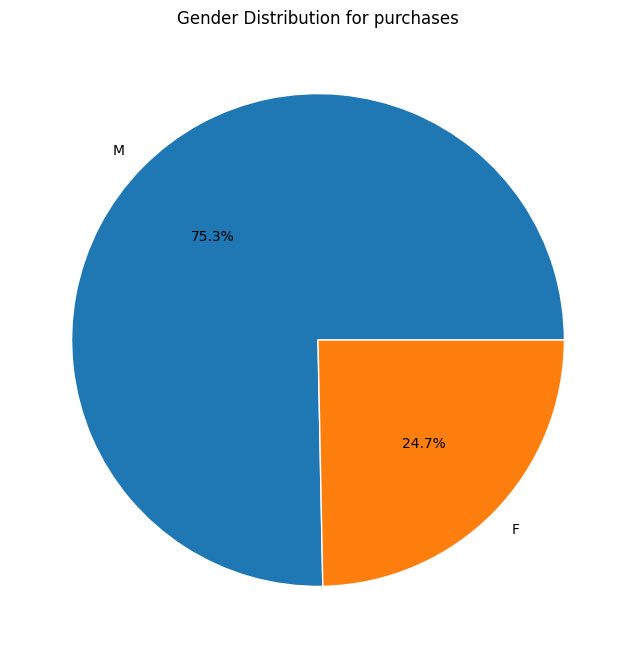

In [130]:
plt.figure(figsize=(8,8))
gender_labels = df['Gender'].value_counts()
wedgeprops = dict(width=1, edgecolor='w')
plt.pie(gender_labels,labels = gender_labels.index,autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title("Gender Distribution for purchases")
plt.show()

Out of all the purchases made, **75.3%** were made by **male** customers and remaining **24.7%** purchases made by **female** customers

In [131]:
#No of male and female customers
gender_distribution = df.groupby("Gender")["User_ID"].nunique()
gender_distribution

,User_ID
Gender,
F,1666
M,4225


Text(0.5, 1.0, 'Male and Female count')

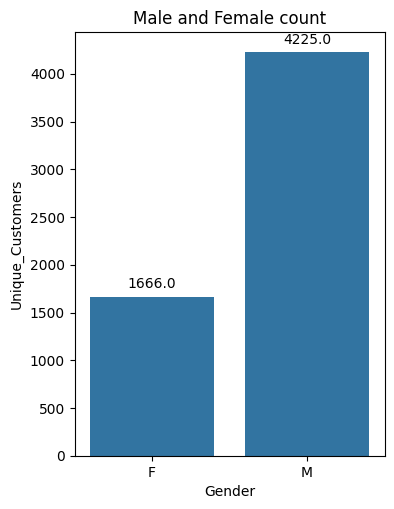

In [132]:
gender_distribution = df.groupby("Gender")["User_ID"].nunique().reset_index()
gender_distribution.columns = ['Gender', 'Unique_Customers']

# Create bar plot with the aggregated data
plt.figure(figsize=(4,5.5))
gc = sns.barplot(x='Gender', y='Unique_Customers', data=gender_distribution)
for p in gc.patches:
    gc.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.title("Male and Female count")

Totally there are **5891** distinct customers with **1666 female** and **4225 male** customers

In [133]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [134]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


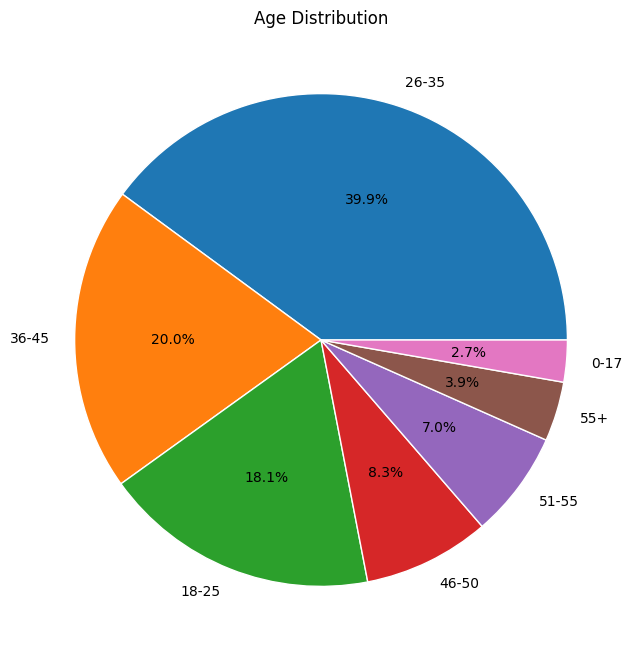

In [135]:
plt.figure(figsize=(8,8))
age_labels = df['Age'].value_counts()
wedgeprops = dict(width=1, edgecolor='w')
plt.pie(age_labels,labels = age_labels.index,autopct='%1.1f%%',wedgeprops=wedgeprops)
plt.title("Age Distribution")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

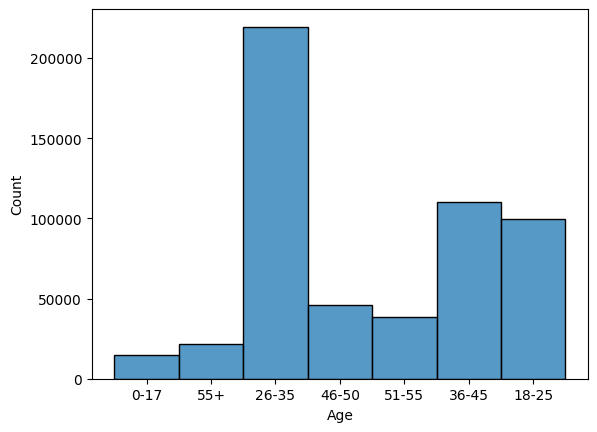

In [136]:
sns.histplot(df['Age'])

**Majority** of the puchases have been made by customers who are aged between **18 and 45** especially who are in **26-35** age category

In [137]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [138]:
df['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


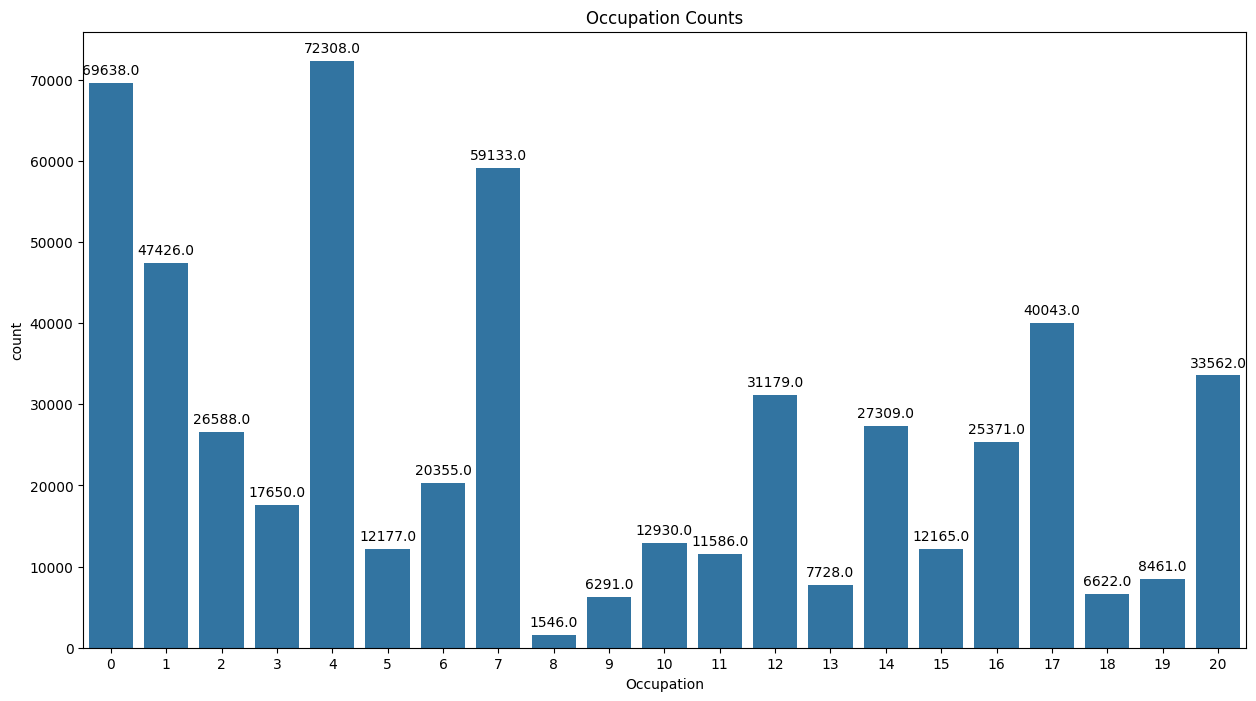

In [139]:
plt.figure(figsize=(15,8))
oc = sns.countplot(x='Occupation',data=df)
plt.title("Occupation Counts")
# Add values on top of each bar
for p in oc.patches:
    oc.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Show the plot
plt.show()

Customers with **OccupationID : 0,4,7** have made most purchases

In [140]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [141]:
df['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


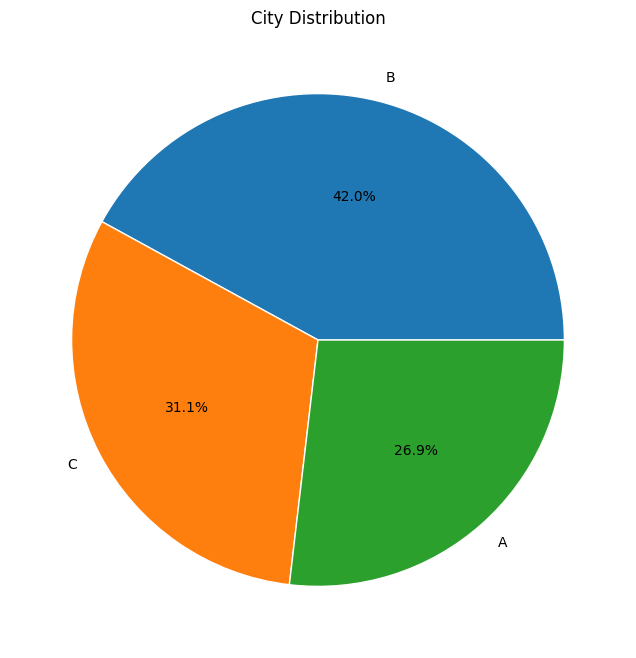

In [142]:
plt.figure(figsize=(8,8))
city_labels = df['City_Category'].value_counts()
wedgeprops = dict(width=1, edgecolor='w')
plt.pie(city_labels,labels = city_labels.index,autopct='%1.1f%%',wedgeprops=wedgeprops)
plt.title("City Distribution")
plt.show()

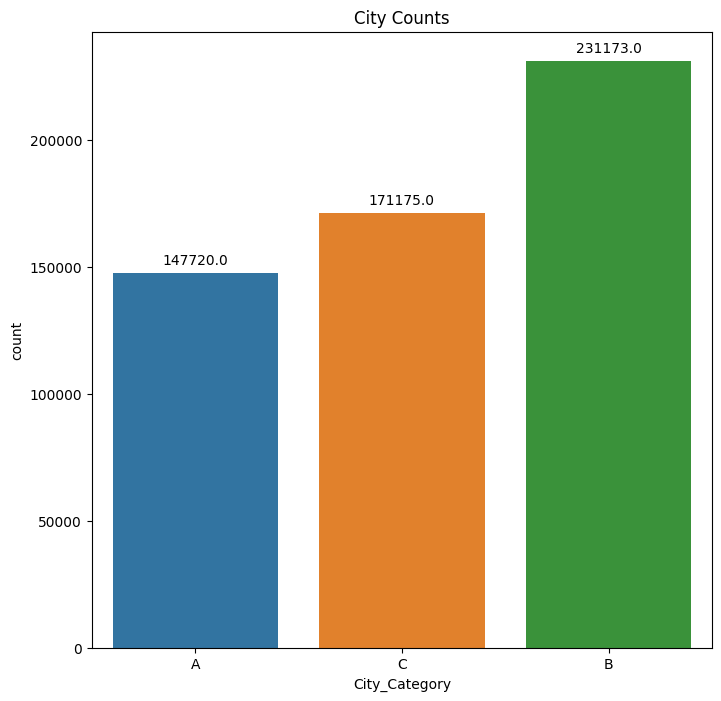

In [143]:
plt.figure(figsize=(8,8))
cc = sns.countplot(x='City_Category',data=df,hue='City_Category')
plt.title("City Counts")

for p in cc.patches:
    cc.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

Customers from **City B** have made the highest number of transactions

In [144]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [145]:
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


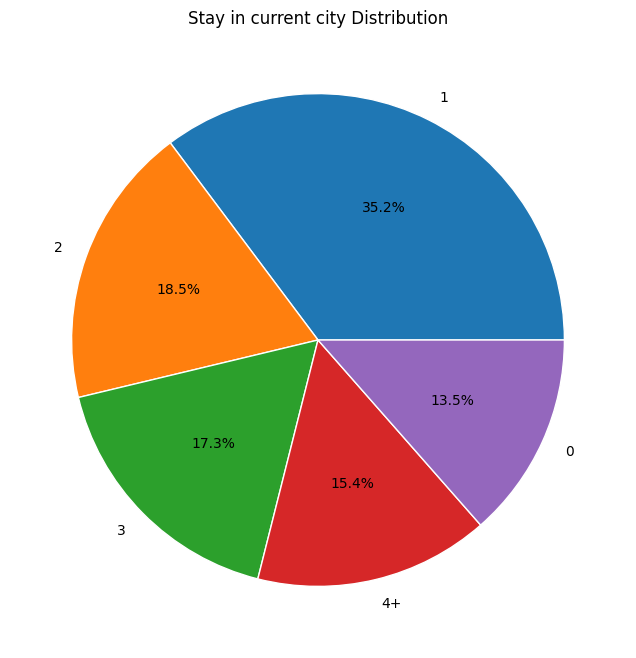

In [146]:

plt.figure(figsize=(8,8))
stay_labels = df['Stay_In_Current_City_Years'].value_counts()
wedgeprops = dict(width=1, edgecolor='w')
plt.pie(stay_labels,labels = stay_labels.index,autopct='%1.1f%%',wedgeprops=wedgeprops)
plt.title("Stay in current city Distribution")
plt.show()

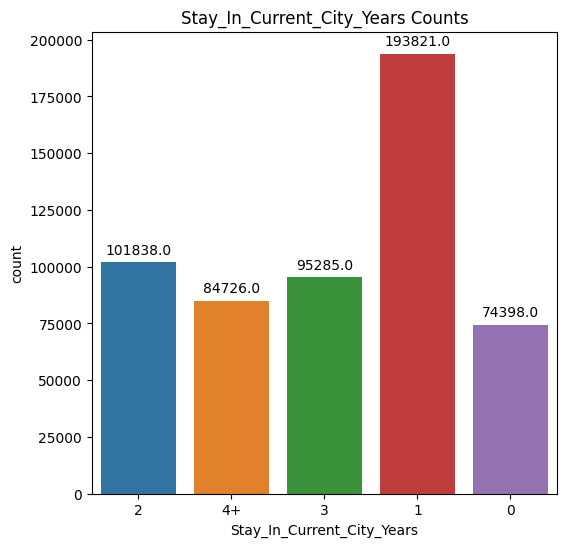

In [147]:
plt.figure(figsize=(6,6))
stay_ = sns.countplot(x='Stay_In_Current_City_Years',data=df,hue='Stay_In_Current_City_Years')
plt.title("Stay_In_Current_City_Years Counts")

for p in stay_.patches:
    stay_.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

Customers who are new to the city and those who have stayed in the current city for 1 year have contributed to almost **49%** of transactions indicating that they are making purchases to setup their home

<Axes: xlabel='Purchase', ylabel='Density'>

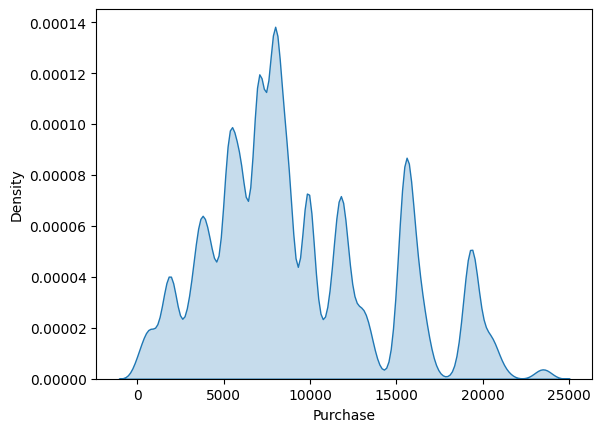

In [148]:
sns.kdeplot(data=df, x='Purchase', fill=True)

In [149]:
df['Marital_Status'].unique()

array([0, 1])

In [150]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


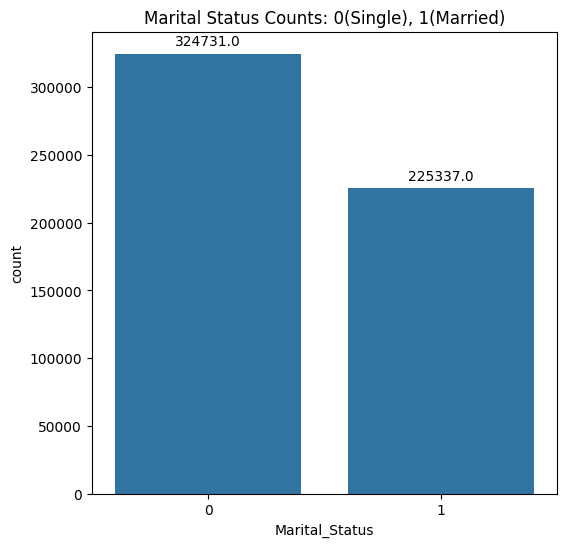

In [151]:
plt.figure(figsize=(6,6))
msc = sns.countplot(x='Marital_Status',data=df)
plt.title("Marital Status Counts: 0(Single), 1(Married)")

for p in msc.patches:
    msc.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

Single people have made most transactions compared to married people

In [152]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [153]:
df['Product_Category'].value_counts()

,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


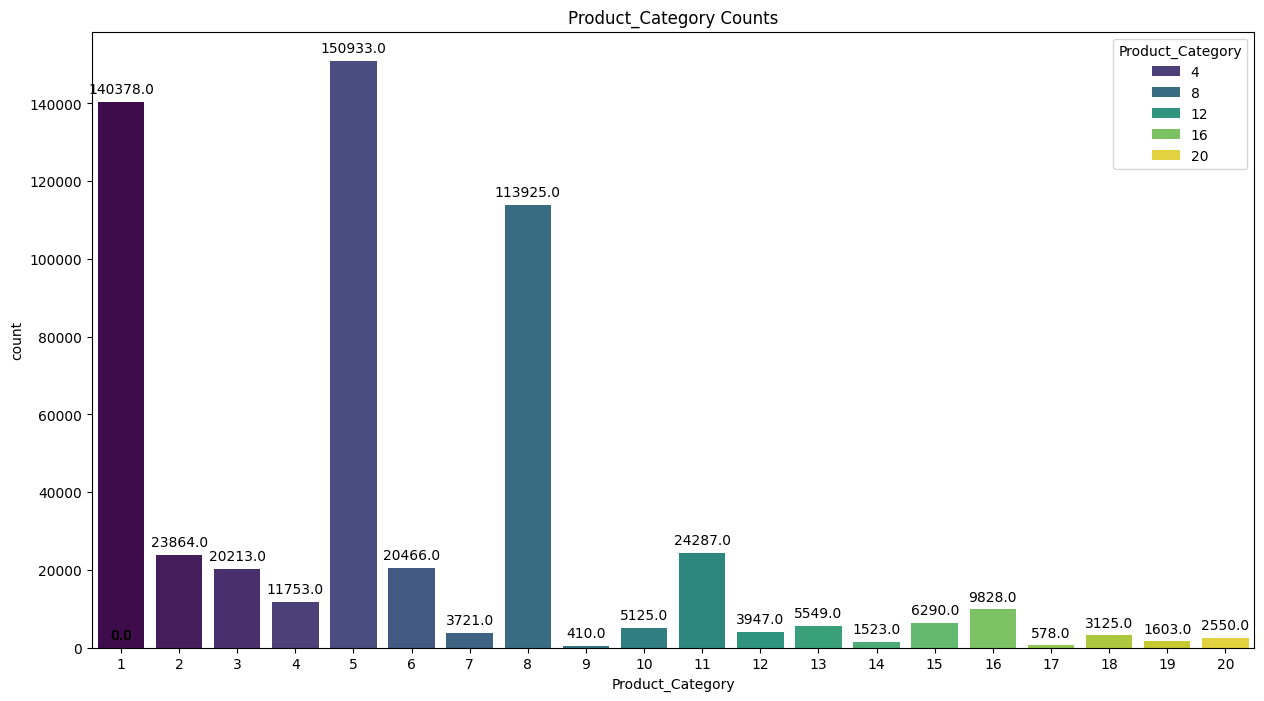

In [154]:
plt.figure(figsize=(15,8))
pcc = sns.countplot(x='Product_Category',data=df,hue='Product_Category',palette='viridis')
plt.title("Product_Category Counts")

for p in pcc.patches:
    pcc.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

Products with Product_ID :1,5 and 8 have been purchased most of the times by the customers with Product_ID:5 topping the charts

In [155]:
df.groupby("User_ID")["Purchase"].sum().sort_values(ascending=False)

,Purchase
User_ID,
1004277,10536909
1001680,8699596
1002909,7577756
1001941,6817493
1000424,6573609
...,...
1004991,52371
1005117,49668
1003883,49349


In [156]:
df.groupby("User_ID")["User_ID"].count().sort_values(ascending=False)

,User_ID
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1002111,7
1005391,7
1002690,7


Customer with **User_ID 1001680** has performed most number of purchases (**1026 orders**) and Customer with **User_ID 1004277** has created the highest monetary value **$10,536,909**

#Outlier check


In [157]:
df['Purchase'].nunique()

18105

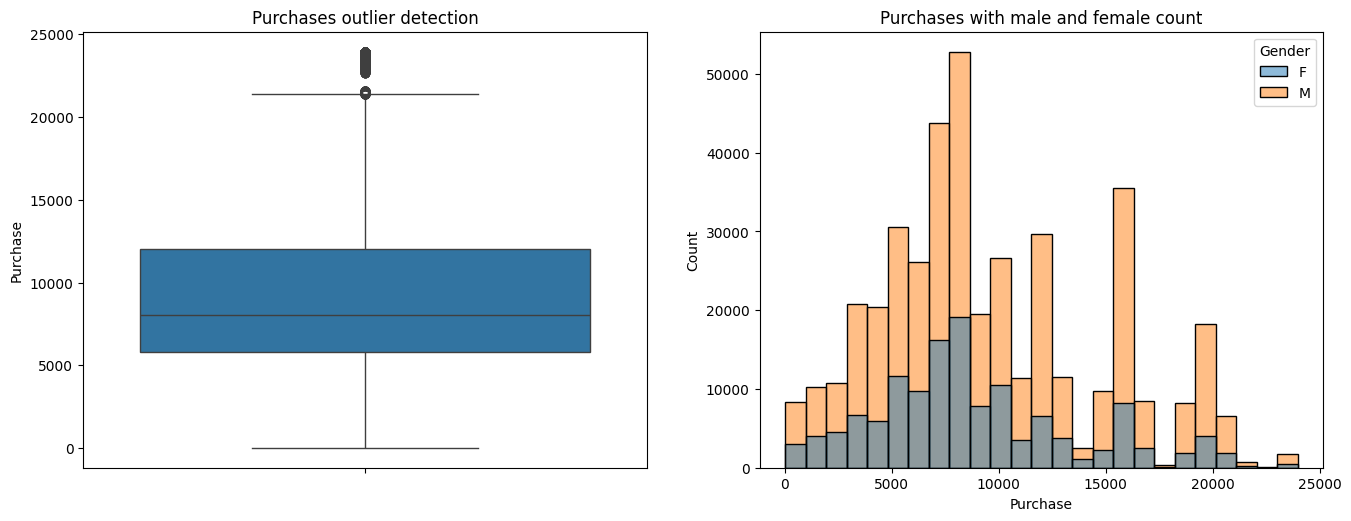

In [158]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=df, y="Purchase", ax=axis[0])
sns.histplot( x='Purchase', data=df, bins=25, hue='Gender',ax=axis[1])

axis[0].set_title('Purchases outlier detection')
axis[1].set_title('Purchases with male and female count')

plt.show()

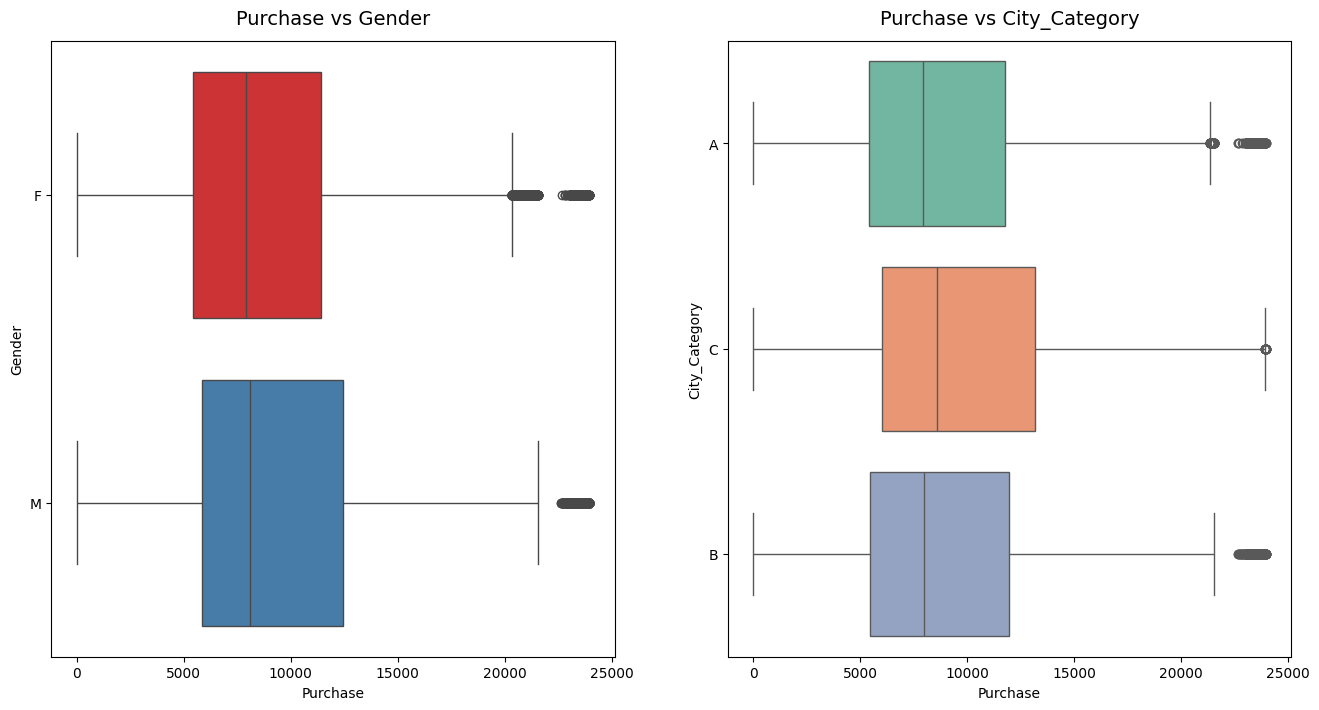

In [159]:
y_attr = ['Gender', 'City_Category']
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# List of palettes for each plot
palettes = ['Set1', 'Set2']

for i in range(2):
    sns.boxplot(data=df, x='Purchase', y = y_attr[i], hue=y_attr[i], ax=axis[i], palette=palettes[i])
    axis[i].set_title(f"Purchase vs {y_attr[i]}", pad=12, fontsize=14)

#Major Observations
1.Out of all the purchases made, **75.3%** were made by **male** customers and remaining **24.7%** purchases made by **female** customers

2.Totally there are **5891** distinct customers with **1666 female** and **4225 male** customers with **72%** of customers being **male**.

3.Almost 60% of the customers who have made purchases are Unmarried

3.**Majority** of the puchases have been made by customers who are aged between **18 and 45** especially who are in **26-35** age category

4.**City B** has made the most number of transactions **(231,173)** accounting to  **42%** of the entire transactions

5.Customers who are new to the city and those who have stayed in the current city for 1 year have contributed to almost **49%** of transactions indicating that they are making purchases to setup their home

6.Most of the transactions have purchase value ranging between **$7000** and **$8000**

7.Product_Category 5 has been purchased most number of times compared to other categories with category 0 and 8 following it.

8.Customer with **User_ID 1001680** has performed most number of purchases (**1026 orders**) and Customer with **User_ID 1004277** has created the highest monetary value **$10,536,909**


#Answering business questions






1. Are women spending more money per transaction than men? Why or Why not?

In [160]:
df["Purchase"].mean()

9263.968712959126

In [161]:
df.groupby("Gender")["Purchase"].mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


Our analysis contradicts the question as the average purchase value of men is greater than women.

2. Confidence intervals and distribution of the mean of the expenses by female and male customers

In [162]:
def mean_calculator(dff,sample_size):
  samples = dff.sample(sample_size)
  n = samples.size
  trials=100000
  random_samples = np.random.choice(samples,(trials,n), replace=True)
  sample_means = random_samples.mean(axis=1)
  return sample_means

def confidence_interval(means, confidence):

  if confidence == 99:
    left = np.percentile(means,0.5)
    right = np.percentile(means,99.5)

  elif confidence == 95:
    left = np.percentile(means, 2.5)
    right = np.percentile(means, 97.5)

  else:
    left = np.percentile(means, 5)
    right = np.percentile(means, 95)

  return round(left,2), round(right,2)

In [163]:
df_male = df[df["Gender"]=='M']['Purchase']
df_female = df[df["Gender"]=='F']['Purchase']

In [164]:
df_male.shape

(414259,)

In [165]:
df_female.shape

(135809,)

In [170]:
# Analysing male and female spending for 500 random samples
male_mean_500 = mean_calculator(df_male,500)
female_mean_500 = mean_calculator(df_female,500)

In [171]:
male_mean_500.mean()

9743.94409768

In [172]:
female_mean_500.mean()

8684.22385416

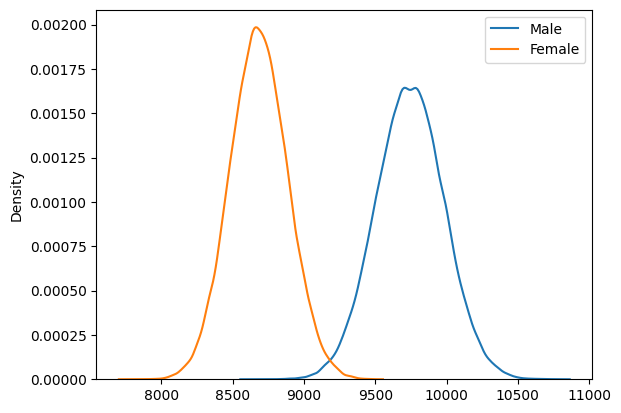

In [173]:
# Understanding the distribution
sns.kdeplot(data = male_mean_500),sns.kdeplot(data = female_mean_500)
plt.legend(['Male','Female'])

In [174]:
# at 99% confidence for male
male_left_99_500,male_right_99_500 = confidence_interval(male_mean_500,99)

# at 99 confidence for female
female_left_99_500,female_right_99_500 = confidence_interval(female_mean_500,99)

print((male_left_99_500,male_right_99_500),(female_left_99_500,female_right_99_500),sep='\n')

(9135.75, 10361.74)
(8167.66, 9216.35)


In [175]:
# at 95% confidence for male
male_left_95_500,male_right_95_500 = confidence_interval(male_mean_500,95)

# at 95 confidence for female
female_left_99_500,female_right_99_500 = confidence_interval(female_mean_500,95)

print((male_left_95_500,male_right_95_500),(female_left_99_500,female_right_99_500),sep='\n')

(9278.82, 10212.64)
(8291.73, 9086.08)


In [176]:
# at 90% confidence for male
male_left_90_500,male_right_90_500 = confidence_interval(male_mean_500,90)

# at 90 confidence for female
female_left_99_500,female_right_99_500 = confidence_interval(female_mean_500,90)

print((male_left_90_500,male_right_90_500),(female_left_99_500,female_right_99_500),sep='\n')

(9352.73, 10135.83)
(8351.75, 9021.1)


While taking sample size of **500**, there is overlap only when the confidence level is **99%** and especially in higher spending ranges. So, we can conclude that high spending customers exhibit little similarity in spending patterns irrespective of the gender

In [177]:
# Analysing male and female spending for 1000 random samples
male_mean_1000 = mean_calculator(df_male,1000)
female_mean_1000 = mean_calculator(df_female,1000)

In [178]:
male_mean_1000.mean()


9221.01169017

In [179]:
female_mean_1000.mean()

8738.41442395

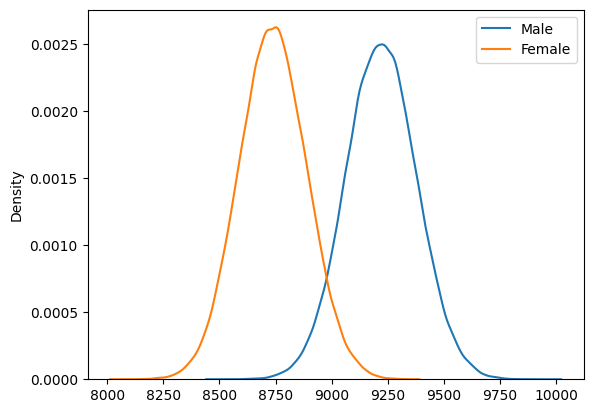

In [180]:
# Understanding the distribution
sns.kdeplot(data = male_mean_1000),sns.kdeplot(data = female_mean_1000)
plt.legend(['Male','Female'])

In [181]:
# at 99% confidence for male
male_left_99,male_right_99 = confidence_interval(male_mean_1000,99)

# at 99 confidence for female
female_left_99,female_right_99 = confidence_interval(female_mean_1000,99)

print((male_left_99,male_right_99),(female_left_99,female_right_99),sep='\n')

(8817.71, 9627.52)
(8353.43, 9128.18)


In [182]:
# at 95 confidence for male
male_left_95,male_right_95 = confidence_interval(male_mean_1000,95)

# at 95 confidence for female
female_left_95,female_right_95 = confidence_interval(female_mean_1000,95)

print((male_left_95,male_right_95),(female_left_95,female_right_95),sep='\n')

(8914.72, 9531.36)
(8445.39, 9035.96)


In [183]:
# at 90 confidence for male
male_left_90,male_right_90 = confidence_interval(male_mean_1000,90)

# at 90 confidence for female
female_left_90,female_right_90 = confidence_interval(female_mean_1000,90)

print((male_left_90,male_right_90),(female_left_90,female_right_90),sep='\n')

(8963.91, 9479.68)
(8492.1, 8987.55)


While taking sample size of **1000**, there is overlap at various confidence intervals specifically in higher spending ranges. So, we can conclude that high spending customers exhibit little similarity in spending patterns.

#Calculating Confidence Interval for Marital Status

In [188]:
ms_1 = df[df['Marital_Status']==1]['Purchase']
ms_0 = df[df['Marital_Status']==0]['Purchase']

In [189]:
# Analysing male and female spending for 500 random samples
ms1_mean_500 = mean_calculator(ms_1,500)
ms0_mean_500 = mean_calculator(ms_0,500)

In [190]:
ms1_mean_500.mean()

9327.136808860001

In [191]:
ms0_mean_500.mean()

9524.64264392

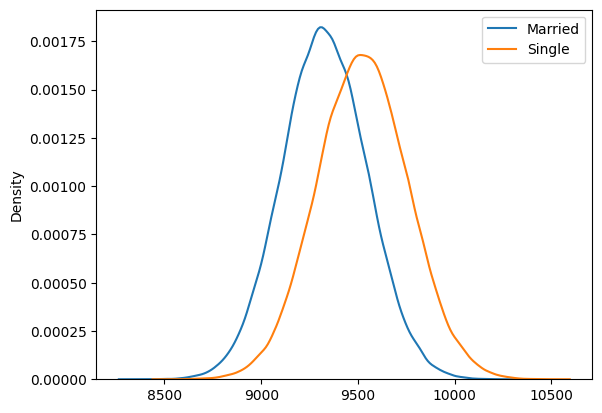

In [192]:
sns.kdeplot(ms1_mean_500),sns.kdeplot(ms0_mean_500)
plt.legend(['Married','Single'])

In [193]:
# at 99% confidence for married
ms1_left_99_500,ms_1_right_99_500 = confidence_interval(ms1_mean_500,99)

# at 99% confidence for single
ms0_left_99_500,ms0_right_99_500 = confidence_interval(ms0_mean_500,99)

print((ms1_left_99_500,ms_1_right_99_500),(ms0_left_99_500,ms0_right_99_500),sep='\n')

(8768.46, 9896.08)
(8922.9, 10131.11)


In [194]:
# at 95% confidence for married
ms1_left_95_500,ms_1_right_95_500 = confidence_interval(ms1_mean_500,95)

# at 95% confidence for single
ms0_left_95_500,ms0_right_99_500 = confidence_interval(ms0_mean_500,95)

print((ms1_left_95_500,ms_1_right_95_500),(ms0_left_95_500,ms0_right_99_500),sep='\n')

(8901.45, 9759.6)
(9068.53, 9987.78)


In [195]:
# at 90% confidence for married
ms1_left_90_500,ms_1_right_90_500 = confidence_interval(ms1_mean_500,90)

# at 90% confidence for single
ms0_left_90_500,ms0_right_99_500 = confidence_interval(ms0_mean_500,90)

print((ms1_left_90_500,ms_1_right_90_500),(ms0_left_90_500,ms0_right_99_500),sep='\n')

(8967.85, 9688.35)
(9141.27, 9910.47)


In [196]:
# Analysing male and female spending for 1000 random samples
ms1_mean_1000 = mean_calculator(ms_1,1000)
ms0_mean_1000 = mean_calculator(ms_0,1000)

In [197]:
ms1_mean_1000.mean()

9296.22699663

In [198]:
ms0_mean_1000.mean()

9375.331992500001

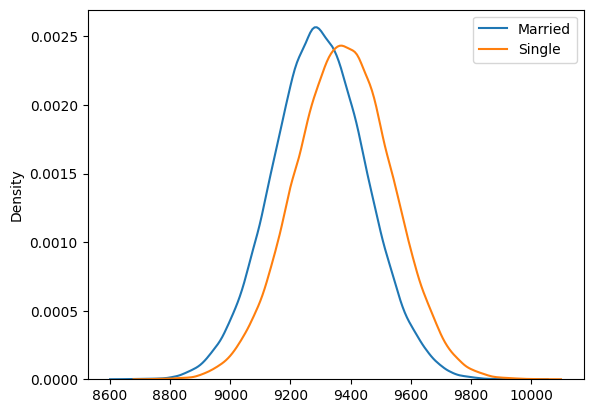

In [199]:
sns.kdeplot(ms1_mean_1000),sns.kdeplot(ms0_mean_1000)
plt.legend(['Married','Single'])

In [200]:
# at 99% confidence for married
ms1_left_99_1000,ms_1_right_99_1000 = confidence_interval(ms1_mean_1000,99)

# at 99% confidence for single
ms0_left_95_1000,ms0_right_99_1000 = confidence_interval(ms0_mean_1000,99)

print((ms1_left_99_1000,ms_1_right_99_1000), (ms0_left_95_1000,ms0_right_99_1000),sep='\n')

(8896.71, 9698.55)
(8961.17, 9789.94)


In [201]:
# at 95% confidence for married
ms1_left_99_1000,ms_1_right_99_1000 = confidence_interval(ms1_mean_1000,95)

# at 95% confidence for single
ms0_left_95_1000,ms0_right_99_1000 = confidence_interval(ms0_mean_1000,95)

print((ms1_left_99_1000,ms_1_right_99_1000),(ms0_left_95_1000,ms0_right_99_1000),sep='\n')

(8989.48, 9606.36)
(9057.67, 9688.86)


In [202]:
# at 90% confidence for married
ms1_left_99_1000,ms_1_right_99_1000 = confidence_interval(ms1_mean_1000,90)

# at 90% confidence for single
ms0_left_95_1000,ms0_right_99_1000 = confidence_interval(ms0_mean_1000,90)

print((ms1_left_99_1000,ms_1_right_99_1000),(ms0_left_95_1000,ms0_right_99_1000),sep='\n')

(9039.45, 9555.0)
(9109.52, 9640.26)


Based on multiple trials on different sample sizes (500&1000) at various confidence levels (99%,95%,90%), we can conclude that there is no substantial difference in average spending patterns of married vs unmarried customers

#Calculating Confidence Interval for Age Category

In [203]:
age_0_17 = df[df["Age"]=="0-17"]["Purchase"]
age_18_25 = df[df["Age"]=="18-25"]["Purchase"]
age_26_35 = df[df["Age"]=="26-35"]["Purchase"]
age_36_45 = df[df["Age"]=="36-45"]["Purchase"]
age_46_50 = df[df["Age"]=="18-25"]["Purchase"]
age_51_55 = df[df["Age"]=="18-25"]["Purchase"]
age_55 = df[df["Age"]=="55+"]["Purchase"]


In [204]:
age_017_means = mean_calculator(age_0_17,1000)
age_1825_means = mean_calculator(age_18_25,1000)
age_2635_means = mean_calculator(age_26_35,1000)
age_3645_means = mean_calculator(age_36_45,1000)
age_4650_means = mean_calculator(age_46_50,1000)
age_5155_means = mean_calculator(age_51_55,1000)
age_55_means = mean_calculator(age_55,1000)


(<Axes: ylabel='Density'>,
 <Axes: ylabel='Density'>,
 <Axes: ylabel='Density'>,
 <Axes: ylabel='Density'>,
 <Axes: ylabel='Density'>,
 <Axes: ylabel='Density'>,
 <Axes: ylabel='Density'>)

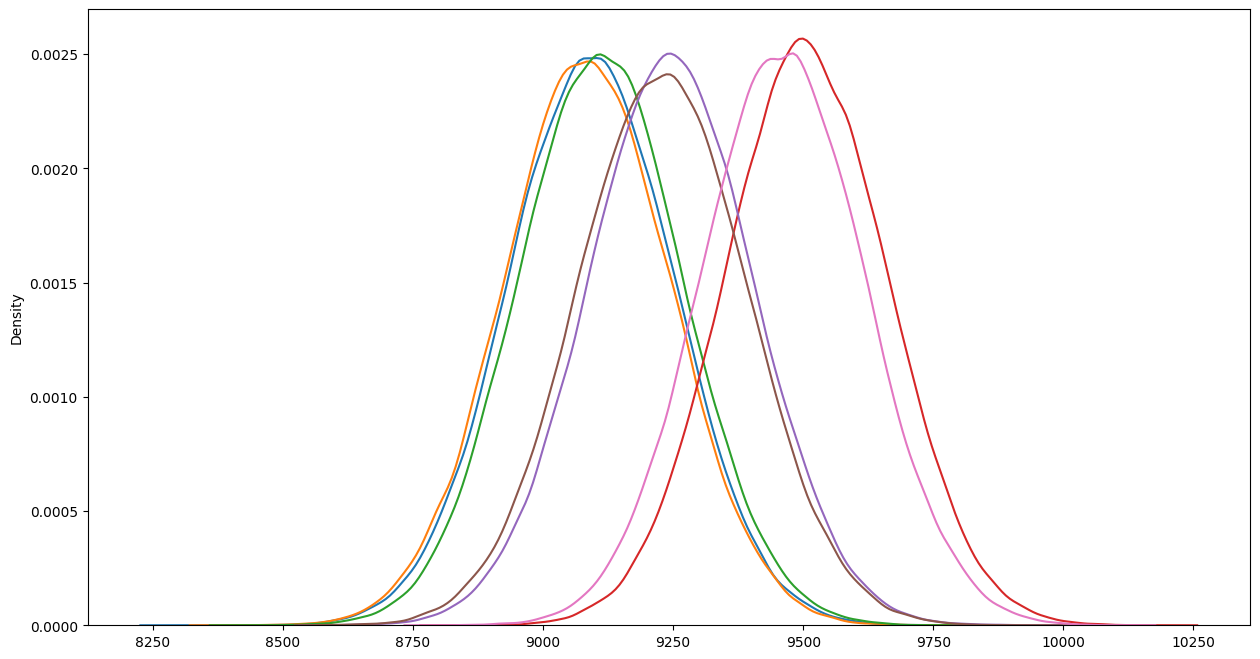

In [205]:
plt.figure(figsize=(15,8))
sns.kdeplot(age_017_means),sns.kdeplot(age_1825_means),sns.kdeplot(age_2635_means),sns.kdeplot(age_3645_means),sns.kdeplot(age_4650_means),sns.kdeplot(age_5155_means),sns.kdeplot(age_55_means)

In [206]:
#99% CI for age groups
age_017_left, age_017_right = confidence_interval(age_017_means,99)
age_1825_left, age_1825_right = confidence_interval(age_1825_means,99)
age_2635_left, age_2635_right = confidence_interval(age_2635_means,99)
age_3645_left, age_3645_right = confidence_interval(age_3645_means,99)
age_4650_left, age_4650_right = confidence_interval(age_4650_means,99)
age_5155_left, age_5155_right = confidence_interval(age_5155_means,99)
age_55_left, age_55_right = confidence_interval(age_55_means,99)

In [207]:
print((age_017_left, age_017_right),(age_1825_left, age_1825_right),(age_2635_left, age_2635_right),(age_3645_left, age_3645_right),(age_4650_left, age_4650_right),(age_5155_left, age_5155_right),(age_55_left, age_55_right),sep='\n')

(8683.66, 9505.45)
(8678.18, 9494.75)
(8709.75, 9523.46)
(9103.65, 9912.58)
(8834.73, 9659.76)
(8812.78, 9652.9)
(9060.76, 9871.82)


In [208]:
#95% CI for age groups
age_017_left, age_017_right = confidence_interval(age_017_means,95)
age_1825_left, age_1825_right = confidence_interval(age_1825_means,95)
age_2635_left, age_2635_right = confidence_interval(age_2635_means,95)
age_3645_left, age_3645_right = confidence_interval(age_3645_means,95)
age_4650_left, age_4650_right = confidence_interval(age_4650_means,95)
age_5155_left, age_5155_right = confidence_interval(age_5155_means,95)
age_55_left, age_55_right = confidence_interval(age_55_means,95)

In [209]:
print((age_017_left, age_017_right),(age_1825_left, age_1825_right),(age_2635_left, age_2635_right),(age_3645_left, age_3645_right),(age_4650_left, age_4650_right),(age_5155_left, age_5155_right),(age_55_left, age_55_right),sep='\n')

(8781.72, 9405.83)
(8772.57, 9399.06)
(8805.6, 9425.12)
(9199.73, 9813.8)
(8932.3, 9560.67)
(8910.23, 9552.81)
(9153.58, 9774.14)


In [210]:
#90% CI for age groups
age_017_left, age_017_right = confidence_interval(age_017_means,90)
age_1825_left, age_1825_right = confidence_interval(age_1825_means,90)
age_2635_left, age_2635_right = confidence_interval(age_2635_means,90)
age_3645_left, age_3645_right = confidence_interval(age_3645_means,90)
age_4650_left, age_4650_right = confidence_interval(age_4650_means,90)
age_5155_left, age_5155_right = confidence_interval(age_5155_means,90)
age_55_left, age_55_right = confidence_interval(age_55_means,90)

In [211]:
print((age_017_left, age_017_right),(age_1825_left, age_1825_right),(age_2635_left, age_2635_right),(age_3645_left, age_3645_right),(age_4650_left, age_4650_right),(age_5155_left, age_5155_right),(age_55_left, age_55_right),sep='\n')

(8831.12, 9354.59)
(8821.78, 9347.85)
(8854.27, 9373.66)
(9248.74, 9764.29)
(8983.58, 9511.05)
(8961.45, 9499.9)
(9202.13, 9723.3)


Based on multiple trials on sample size of 1000 at various confidence levels (99%,95%,90%), we can conclude that there no significant difference in spending patterns since there is huge overlap in average spending patterns of customers of different age categories

#Confidence Interval for City Category

In [212]:
cityA = df[df["City_Category"]=='A']['Purchase']
cityB = df[df["City_Category"]=='B']['Purchase']
cityC = df[df["City_Category"]=='C']['Purchase']

In [213]:
# Analysing male and female spendind for 1000 random samples
cityA_mean = mean_calculator(cityA,1000)
cityB_mean = mean_calculator(cityB,1000)
cityC_mean = mean_calculator(cityC,1000)

(<Axes: ylabel='Density'>, <Axes: ylabel='Density'>, <Axes: ylabel='Density'>)

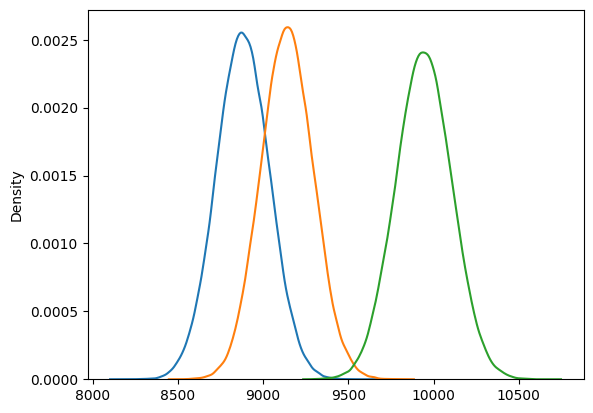

In [214]:
sns.kdeplot(cityA_mean),sns.kdeplot(cityB_mean),sns.kdeplot(cityC_mean)

In [215]:
#Calculating 99% CI
cityA_left_99, cityA_right_99 = confidence_interval(cityA_mean,99)
cityB_left_99, cityB_right_99 = confidence_interval(cityB_mean,99)
cityC_left_99, cityC_right_99 = confidence_interval(cityC_mean,99)

In [216]:
print((cityA_left_99, cityA_right_99),(cityB_left_99, cityB_right_99),(cityC_left_99, cityC_right_99),sep='\n')

(8486.08, 9281.11)
(8749.65, 9540.85)
(9525.27, 10368.71)


In [217]:
#Calculating 95% CI
cityA_left_95, cityA_right_95 = confidence_interval(cityA_mean,95)
cityB_left_95, cityB_right_95 = confidence_interval(cityB_mean,95)
cityC_left_95, cityC_right_95 = confidence_interval(cityC_mean,95)

In [218]:
print((cityA_left_95, cityA_right_95),(cityB_left_95, cityB_right_95),(cityC_left_95, cityC_right_95),sep='\n')

(8576.95, 9185.85)
(8843.24, 9442.98)
(9623.18, 10264.71)


In [219]:
#Calculating 90% CI
cityA_left_90, cityA_right_90 = confidence_interval(cityA_mean,90)
cityB_left_90, cityB_right_90 = confidence_interval(cityB_mean,90)
cityC_left_90, cityC_right_90 = confidence_interval(cityC_mean,90)

In [220]:
print((cityA_left_90, cityA_right_90),(cityB_left_90, cityB_right_90),(cityC_left_90, cityC_right_90),sep='\n')

(8625.49, 9137.32)
(8889.66, 9393.25)
(9672.65, 10212.93)


Unlike age categories and marital status, the confidence interval for city categories shows a significant trend in spending pattern. City C has the highest average spending followed by City B at multiple confidence levels (99%,95%,90%)

#Recommendations

1. It is observed that the campaign has been dominated by male customers. Walmart could improve the next year's campaign by tailoring specific deals for female customers.

2. 18-45 has been the age group that has spent more money. So, walmart can focus more on this age group to retain the customer base. Also, they should expand outreach to other age groups as well.

3. City B tends to spend more compared to city A and C. Special deals can be made to attract customers in city A and C. And in order to retain customers in city B, more information about the customers can be collected apart from demographics to understand why they spend more than other cities.

4. People who are new to the city tend to spend more compared to those who have stayed for a longer time. This can be due to various reasons (eg: setup their home). Targeted offers can be designed for those people.

5. Walmart should also understand why people staying in city for longer period are not spending more. Focusing here can help them to outplay their competitors.

6. People who are married and unmarried tend to spend almost similar. Walmart can continue with this pattern since there is no to less bias.

7. Product Cateogry with ID:1,5,8 have been the best sellers. Walmart should ensure that they have enough inventory in hand throughout next year's black friday sale.

8. Special focus can be given to understand why other product categories which yields more profit are selling less. Understanding this can help to curate special offers for those specific products in order to boost revenue.